# MIS 492 - Data Analysis and Visualization
## Week 6

## Visualization With Seaborn

### Dr. Mohammad AlMarzouq

# Skills Learned So Far
- Loading data
- Univariate exploration of data to find problems
    - Using simple matplotlibs
- Filteration
- Data manipulation

### You can prepare the dataframe that you will perfor EDA on

# What Is Seaborn?
- Plotting library built on top of matplotlib
- Adds more plotting options
- Simplifies plotting for some complex plots
- Improves the look of matplotlib plots
- Works almost exactly like matplot lib

# First Install Seaborn
Open Terminal or CMD and type the following command:
```bash
pip install seaborn

pip install statsmodels
```

# Using Seaborn

Just like pandas you have to import it:

In [1]:
# don't forget this
%matplotlib inline 
import seaborn as sns

# Now tell jupyter to use seaborn colors
sns.set(color_codes=True)

# Load Data Using URL
- The url is: https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv
- Load into weather_df variable
- You can pass the url as a string into pd.read_csv and pandas will download the data:

In [101]:
import pandas as pd
weather_df = pd.read_csv("https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv")

In [9]:
# Your turn
# load https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json
# into cars_df


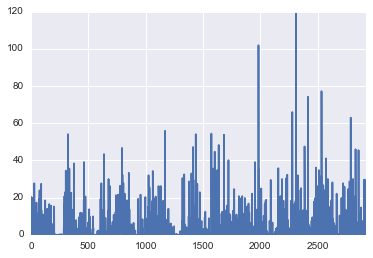

In [3]:
# Try to plot the distribution of the precipitation column
weather_df.precipitation.plot()

In [ ]:
# What was new about the previous plot?
# Can you do a histogram of precipitation


# Plots So Far
- Look better with seaborn
- Still univariate only
- Not much control

So let's try to improve

# General Seaborn/Matplot Workflow
1. Create an empty figure
2. Add single or multiple plots
    - Set the plot type and assign data to axis
3. Modify the aesthetics of the plot (e.g. axis, text, labels, ..etc.)
4. Show/Save the plot

Great for overlaying plots, making customization, and creating trellis/grid plots

# Simple Seaborn Workflow
- Just set the data to create a single plot

Excellent for quick EDA and allows for some customization

# CheatSheets
Use these to remind you about the basic workflow
- [Matplotlib](Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](seaborn_cheat_sheet.pdf)

**Source:** Datacamp.com

# Resources
- [How matplot lib works](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Matplot tutorials](https://matplotlib.org/tutorials/index.html) **Excellent resource on how to perform tasks**
- [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)

# Univariate Plots (Distributional)
- BarPlot/CountPlot
- Histogram/Distribution plot
- PieChart
- Boxplot
- Violinplot
- Swarmplot
- Stripplot

# Univariate Plots (Distributional)
- Use these plots to examine the distribution of a single variable
- You can use them also later to compare distributions of two variable or two groups
- To determine which to use, refer again to this [cheatsheet as a starting point](https://i1.wp.com/www.tatvic.com/blog/wp-content/uploads/2016/12/Pic_2.png)

Let's examine how the weather_df and cars_df look like:

In [5]:
# How do we examine weather_df to know what columns exist?


In [7]:
# How do we examine cars_df to know what columns exist?


# Bar Plot/Count Plot
- Best for counting occorances and distribution of categorical data
- Count Plot is the name used in seaborn to distinguish it from the matplot bar plot, but they are the same
- Which columns are best examined using it?

- **weather_df**: Location, Weather
- **cars_df**: Cylinders, Origin, Year.
    - What about Name?

# How To Use Count Plot
- Check the reference for [Count Plot in Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- sns.countplot is the function
- Requires data argument, and name of variable to plot
    - Alternatively, you can just pass the variable
- Useful to get count of each category

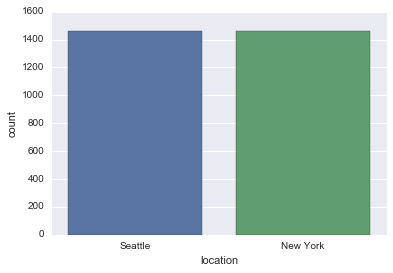

In [10]:
# BEWARE of case sensitivity, "Location" will not work!
sns.countplot("location", data=weather_df)

# Saving The Image Is Simple

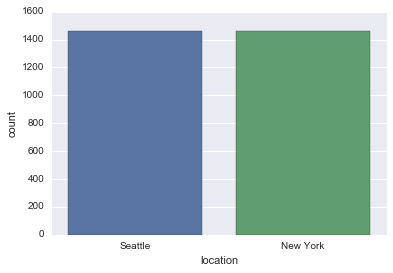

In [11]:
# Store the image in a variable:
cnt_plt = sns.countplot("location", data=weather_df)
# use saveFig and give the file a name
cnt_plt.figure.savefig("location_count1")
# For transparent background use
cnt_plt.figure.savefig("location_count2", transparent=True)

In [ ]:
# Your turn to examine the distribution of other categorical variables we identified
# from both weather_df and cars_df


# What About Cars_df.Name?
- Let's try to plot it using countplot and see what the problem is:

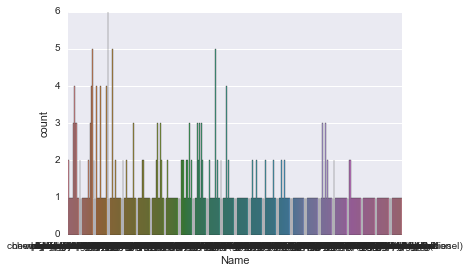

In [12]:
name_plt = sns.countplot('Name', data=cars_df)

# What Can We Do?
- Problem: Overwhelming plot which we cannot make sense of



- Cause: Many categories

- Solution: Reduce the categories, but how?
    - By getting a subset, we cannot work with all the data in this case
    - Must use meaningful criteria, for example:
        - Sort the data based on count, then filter by eamining the top/bottom 5 or 10

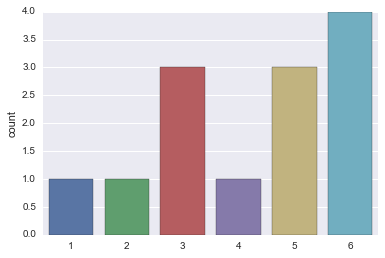

In [13]:
# But first, notice how countplot works
data = [1,2,3,3,3,4,5,5,5,6,6,6,6]
names_plt = sns.countplot(data)

# CountPlot will do the counting of the categories for you

In [14]:
# Look at cars_df.Name
cars_df.Name

# It is just a list of names (Pandas calls it series)
# CountPlot is able to count them but the image is not readable

0              chevrolet chevelle malibu
1                      buick skylark 320
2                     plymouth satellite
3                          amc rebel sst
4                            ford torino
5                       ford galaxie 500
6                       chevrolet impala
7                      plymouth fury iii
8                       pontiac catalina
9                     amc ambassador dpl
10                  citroen ds-21 pallas
11      chevrolet chevelle concours (sw)
12                      ford torino (sw)
13               plymouth satellite (sw)
14                    amc rebel sst (sw)
15                   dodge challenger se
16                    plymouth 'cuda 340
17                 ford mustang boss 302
18                 chevrolet monte carlo
19               buick estate wagon (sw)
20                 toyota corona mark ii
21                       plymouth duster
22                            amc hornet
23                         ford maverick
24              

In [15]:
# Let's get the name count and filter the top ten
# Let's see how the data looks like
cars_df.Name.value_counts()[:10]

ford pinto            6
amc matador           5
ford maverick         5
toyota corolla        5
toyota corona         4
chevrolet chevette    4
peugeot 504           4
chevrolet impala      4
amc hornet            4
amc gremlin           4
Name: Name, dtype: int64

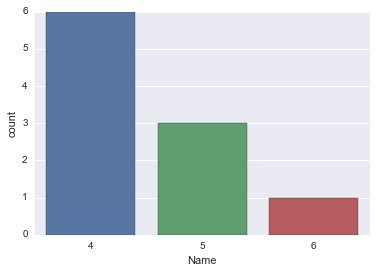

In [16]:
# CountPlot doesnt work well with value-count data
# If we use it, it will count the numbers for us
# and find the times 6s, 5s, and 4s occured
data = cars_df.Name.value_counts()[:10]
sns.countplot(data)

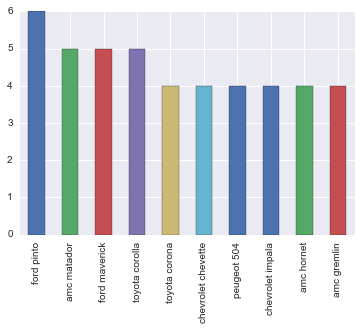

In [17]:
# Instead use simply bar plot from matplot lib
# after filtering topten from value_counts

cars_df.Name.value_counts()[:10].plot(kind="bar")

# What can you tell from this plot?

# Distribution Plot
- Useful to look at the distribution of values for a continuous or numeric variable
- Named a distribution plot to distinguish it from the matplot lib histogram, but they are the same
- Which variables can we plot using it?

In [18]:
weather_df.head()

,location,date,precipitation,temp_max,temp_min,wind,weather
0,Seattle,2012-01-01 00:00,0.0,12.8,5.0,4.7,drizzle
1,Seattle,2012-01-02 00:00,10.9,10.6,2.8,4.5,rain
2,Seattle,2012-01-03 00:00,0.8,11.7,7.2,2.3,rain
3,Seattle,2012-01-04 00:00,20.3,12.2,5.6,4.7,rain
4,Seattle,2012-01-05 00:00,1.3,8.9,2.8,6.1,rain


In [19]:
cars_df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


# Distribution Plot
- weather_df: precipitation, temp_max, temp_min, wind
- cars_df: Acceleration, Displacement, Horsepower, Miles_per_Gallon, Weight_in_lbs
    - Why isn't Cylinders included here?

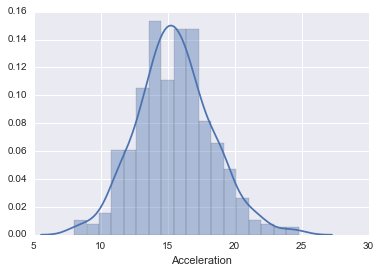

In [20]:
sns.distplot(cars_df.Acceleration)

# Add the argument kde=False to remove the distribution line
# you can set the range of values in each bar
# using bins argument

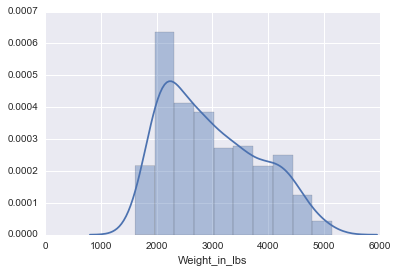

In [22]:
# Here is the distribution of another variable
sns.distplot(cars_df.Weight_in_lbs)

In [47]:
# try to plot cars_df.Horsepower
# What is the problem?
# how can we fix it? (2 solutions available)

# Pie Chart
- Used to represent proportinos of **categorical** variables
- Available in Matplotlin

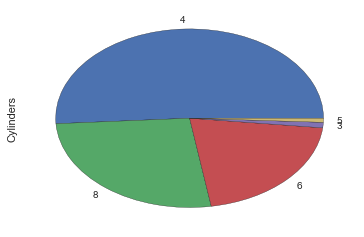

In [51]:
cars_df.Cylinders.value_counts().plot(kind="pie")

([<matplotlib.patches.Wedge at 0x119c8bb38>,
  <matplotlib.text.Text at 0x119c9e518>])

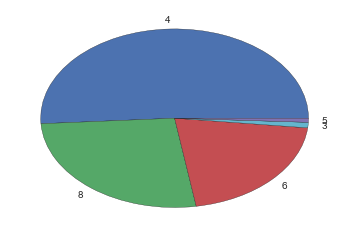

In [66]:
# another way of doing it with matplot lib
import matplotlib.pyplot as plt
plt.pie(cars_df.Cylinders.value_counts(), labels=cars_df.Cylinders.value_counts().index)

# BoxPlot
- One of the original plots for EDA
- Used with continuous variables
- Gives an idea about distribution/skewness of data
- Inter-Quartile Range (IQR in the both (1st to 3rd quartiles)
- Shows possible outliers (above/below 1.5*IQR)
- Shows outliers (above/below 3*IQR)
- Used best to compare distributions of variables or subgroups

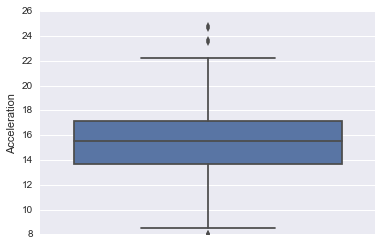

In [77]:
# orient can be 'v' or 'h
sns.boxplot(cars_df.Acceleration, orient='v')

# Your Turn
Explore the [seaborn documentation](https://seaborn.pydata.org/api.html) and try to plot the categorical variables using:
- Violin Plot
- Swarm Plot
- Strip Plot

In [78]:
# Your work here
# You can add cells as needed

# Time Series
- Time series is data that changes over time
- When plotting such data, the value is placed in the Y axis with the time value on the X axis
- Time can be period, day, date, week, month, year ..etc
- Time values will be ordered

# Plotting Time Series
- Typically, line plots or scatter plots can be used
- Possible to use other plots if they make sense and can show the message you are trying to convey
    - Experiment to see what you can do
- You can use seaborn tsplot, but it will be removed in the future
- Use matplotlib plot_date


In [129]:
# But first, remember to convert the date field to datetime object
weather_df.date = pd.to_datetime(weather_df.date)

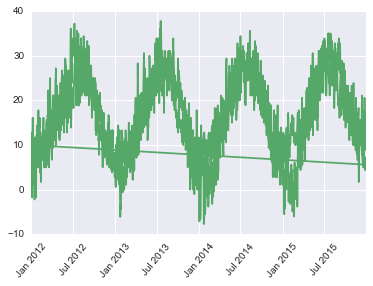

In [130]:
# to rotate the date by 50 degrees
plt.xticks(rotation=50)

plt.plot_date(x=weather_df.date, y=weather_df.temp_max, fmt='g-')

# What is the fmt part?
- Allows you to control how the values are drawn on the plot
- You can set shapes, lines, and colors
- `fmt='g-'` means green solid line
- Remove it and run the plot again, see what happens

# Example of fmt Strings 
| Character | Description |
| --- | ---|
|'-'|	solid line style|
|'--'|	dashed line style|
|'-.'|	dash-dot line style|
|':'|	dotted line style|
|'.'|	point marker|
|','|	pixel marker|
|'o'|circle marker|

- Complete list can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)
- You can even set the color

# Your Turn
Examin the documentation for [seaborn on aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) and [matplotlib tutorials](https://matplotlib.org/tutorials/index.html) to modify the plots that we have made so far. Specifically, you need to select 4 different plot from above and perform the following:
- Change the labels
- Change the ticks
- Change the title of the plot
- Change the date format of a time series plot to be Day-Month
    - Hint: see [this discussion](https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels-in-matplotlib) on how to do it
- Change the ticks
- Change the color pallet and style
- **Bonus:** Try to add arrows and text to point at data points in the graph

In [1]:
# Your work here
# don't forget to move the plots you will work on here